Fase 2: Análise de Regressão Linear Múltipla
Agora, em vez de uma variável independente x (por exemplo, quando nós modelamos o preço da casa com base apenas em seu tamanho), vamos considerar múltiplas variáveis independentes x1, x2, ... xN. Com isso, iremos prever preço da casa com base em seu tamanho e número de quartos.

In [111]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

Funções utilizadas na fase anterior

In [112]:
def correlacao(x, y):
    n = len(x)
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    # Fórmula: r = Σ(x - x̄)(y - ȳ) / sqrt[Σ(x - x̄)²] * [Σ(y - ȳ)²]
    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador_x = sum((xi - media_x) ** 2 for xi in x)
    denominador_y = sum((yi - media_y) ** 2 for yi in y)
    r = numerador / np.sqrt(denominador_x * denominador_y)
    return r

def regressao(b0, b1, x):
    y = []
    for xi in x:
        y.append(b0 + b1 * xi)
    return np.array(y)

def getB1(x, y):
    n = len(x)
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    # Fórmula: b1 = Σ(x - x̄)(y - ȳ) / Σ(x - x̄)²
    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador = sum((xi - media_x) ** 2 for xi in x)

    b1 = numerador / denominador
    return b1

def getB0(x, y, b1):
    n = len(x)
    # Formúla: b0 = ȳ - b1*x̄
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    b0 = media_y - b1 * media_x
    return b0

def plot_dataset(x, y, b0, b1, r, title):
    plt.scatter(x, y, label="Dados")
    # Calcule os valores da linha de regressão antes de chamar plt.plot
    y_regressao = regressao(b0, b1, np.array(x))
    plt.plot(x, y_regressao, color="red", label="Regressão Linear")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{title}\nr = {r:.4f}\nβ₀ = {b0:.4f}, β₁ = {b1:.5f}")
    plt.legend()
    plt.show()

a) Faça o download dos dados do arquivo data.mat ou data.csv. A primeira coluna é o tamanho da casa, a segunda coluna é o número de quartos, e a terceira coluna é o preço da casa.

In [113]:
file_path = "data.csv"
df = pd.read_csv(file_path, header=None)
df.columns = ["Tamanho", "Qnt-Quartos", "Valor"]

b) Utilize o comando python .describe()para fazer uma primeira análise estatística da sua base de dados. Qual a média de preço das casas? Quanto custa a menor casa? Quantos quartos tem a casa mais cara?

In [114]:
print(df.describe())

media_preco = df["Valor"].mean()
menor_casa = df["Tamanho"].min()
quartos_mais_cara = df.loc[df["Valor"].idxmax(), "Qnt-Quartos"]

print(f"Média de preço das casas: {media_preco:.2f}")
print(f"Tamanho da menor casa: {menor_casa}")
print(f"Número de quartos da casa mais cara: {quartos_mais_cara}")

Object `cara` not found.


c) Gere uma matriz X para as variáveis ​​independentes (que são o tamanho da casa e o número de quartos) e o vetor y da variável dependente (que é o preço).

In [115]:
X = df[["Tamanho", "Qnt-Quartos"]].values
Y = df["Valor"].values

d) Verifique a correlação e a regressão para Tamanho da casa e Preço, e, Número de quartos e Preço e apresente os valores no gráfico de dispersão.

Correlação Tamanho x Preço: 0.8550


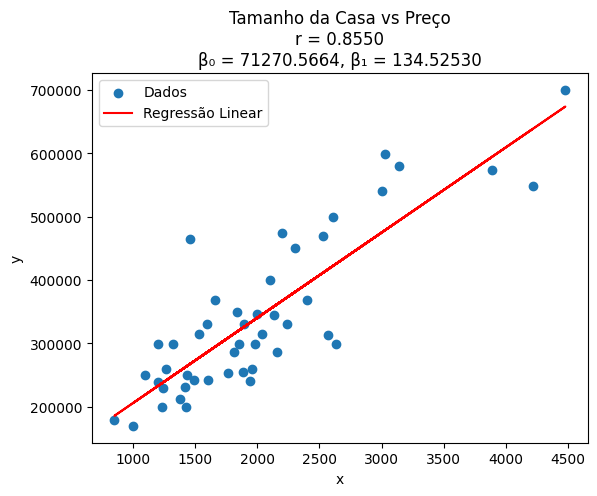

Correlação Quartos x Preço: 0.4423


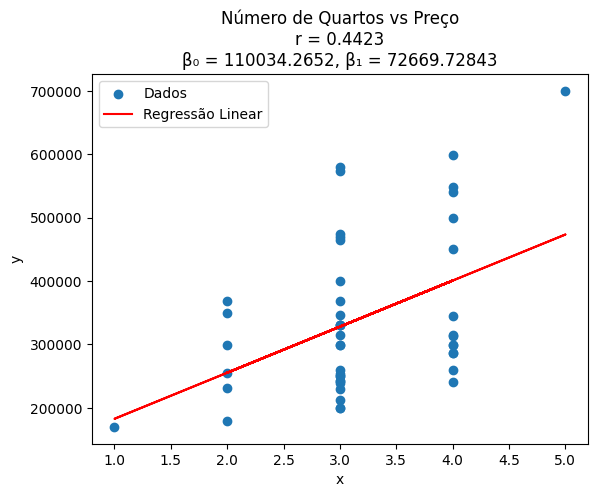

In [116]:
cor_tamanho_preco = correlacao(df["Tamanho"], df["Valor"])
b1_tamanho = getB1(df["Tamanho"], df["Valor"])
b0_tamanho = getB0(df["Tamanho"], df["Valor"], b1_tamanho)

print(f"Correlação Tamanho x Preço: {cor_tamanho_preco:.4f}")
plot_dataset(
    df["Tamanho"],
    df["Valor"],
    b0_tamanho,
    b1_tamanho,
    cor_tamanho_preco,
    "Tamanho da Casa vs Preço",
)

cor_quartos_preco = correlacao(df["Qnt-Quartos"], df["Valor"])
b1_quartos = getB1(df["Qnt-Quartos"], df["Valor"])
b0_quartos = getB0(df["Qnt-Quartos"], df["Valor"], b1_quartos)

print(f"Correlação Quartos x Preço: {cor_quartos_preco:.4f}")
plot_dataset(
    df["Qnt-Quartos"],
    df["Valor"],
    b0_quartos,
    b1_quartos,
    cor_quartos_preco,
    "Número de Quartos vs Preço",
)


e) Calcule a Regressão Múltipla. Faça o gráfico de dispersão em 3D com o tamanho da casa, número de quartos, e o preço da casa. Neste caso iremos trabalhar com o espaço 3D (verifique como usar Axes3D).
f) Trace a linha da regressão no Gráfico de Dispersão. Você pode girar este gráfico para visualizar melhor os dados.
g) Mostre na figura os coeficientes de correlação entre Tamanho da casa e Preço e Número de quartos e Preço.

In [117]:
def getBetas(x, y):
    # Fórmula: β = (XᵀX)⁻¹Xᵀy
    X_b = np.c_[np.ones((x.shape[0], 1)), x]
    beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return beta

In [118]:
def regmultipla(x, beta):
    # Fórmula: y = X*β
    X_b = np.c_[np.ones((x.shape[0], 1)), x]
    y_pred = X_b @ beta
    return y_pred

In [119]:
def plot_regressao_3d(df, beta, x, cor_tamanho, cor_quartos):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        df["Tamanho"],
        df["Qnt-Quartos"],
        df["Valor"],
        c="blue",
        marker="o",
        s=50,
        alpha=0.6,
        label="Dados",
    )
    x_surf = np.linspace(df["Tamanho"].min(), df["Tamanho"].max(), 20)
    y_surf = np.linspace(df["Qnt-Quartos"].min(), df["Qnt-Quartos"].max(), 20)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = regmultipla(np.c_[X_surf.ravel(), Y_surf.ravel()], beta).reshape(X_surf.shape)
    ax.plot_surface(X_surf, Y_surf, Z_surf, color="red", alpha=0.3)
    ax.set_xlabel("Tamanho da casa (m²)")
    ax.set_ylabel("Número de quartos")
    ax.set_zlabel("Preço (R$)")
    ax.set_title(
        f"Regressão Linear Múltipla\n"
        f"r(Tamanho, Preço) = {cor_tamanho:.4f}\n"
        f"r(Quartos, Preço) = {cor_quartos:.4f}\n"
        f"ŷ = {beta[0]:.2f} + {beta[1]:.4f}×Tamanho + {beta[2]:.4f}×Quartos"
    )
    plt.show()


Coeficientes da Regressão Múltipla:
Intercepto (β₀): 89597.7660
Tamanho (β₁):    139.2106
Quartos (β₂):    -8737.9154


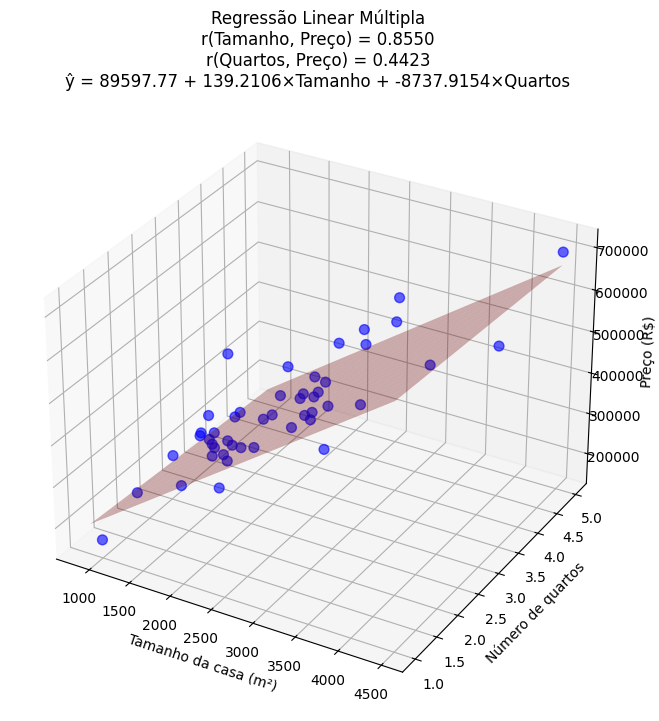

In [120]:
beta = getBetas(X, Y)

print(f"\nCoeficientes da Regressão Múltipla:")
print(f"Intercepto (β₀): {beta[0]:.4f}")
print(f"Tamanho (β₁):    {beta[1]:.4f}")
print(f"Quartos (β₂):    {beta[2]:.4f}")

plot_regressao_3d(df, beta, X, cor_tamanho_preco, cor_quartos_preco)

h) Calcule o preço de uma casa que tem tamanho de 1650 e 3 quartos. O resultado deve ser igual a 293081. Aumente e diminua a quantidade de número de quartos. O que acontece? Por qual motivo?

In [121]:
def prever_preco(beta, variaveis):
    preco = beta[0]
    for i in range(1, len(beta)):
        preco += beta[i] * variaveis[i - 1]
    return preco

def variando_quartos(beta, tamanho_teste):
    precos = []
    for q in range(1, 6):
        preco = prever_preco(beta, [tamanho_teste, q])
        precos.append((q, preco))
    return precos

tamanho_teste = 1650
quartos_teste = 3
preco_previsto = prever_preco(beta, [tamanho_teste, quartos_teste])

print(f"Casa com {tamanho_teste}m² e {quartos_teste} quartos:")
print(f"Preço previsto: R$ {preco_previsto:.0f}")

print(f"\nVariando número de quartos (tamanho fixo em {tamanho_teste}m²):")
precos = variando_quartos(beta, tamanho_teste)

for quartos, preco in precos:
    print(f"{quartos} quartos: R$ {preco:.0f} (diferença: {preco - preco_previsto:+.0f})")

Casa com 1650m² e 3 quartos:
Preço previsto: R$ 293082

Variando número de quartos (tamanho fixo em 1650m²):
1 quartos: R$ 310557 (diferença: +17476)
2 quartos: R$ 301819 (diferença: +8738)
3 quartos: R$ 293082 (diferença: +0)
4 quartos: R$ 284344 (diferença: -8738)
5 quartos: R$ 275606 (diferença: -17476)


Conforme maior o número de quartos mais o preço diminui, isso acontece pois o modelo "aprendeu" que o que influencia no preço da casa é seu tamanho e não seu número de quartos.

i) Compare seus resultados com a função de regressão linear múltipla do python. Para isso você irá precisar das bibliotecas numpy e scikit-learn.

In [122]:
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X, Y)

print(f"\nCoeficientes sklearn:")
print(f"β₀ (intercepto): {modelo_sklearn.intercept_:.4f}")
print(f"β₁ (tamanho):    {modelo_sklearn.coef_[0]:.4f}")
print(f"β₂ (quartos):    {modelo_sklearn.coef_[1]:.4f}")

print(f"\nCoeficientes implementação própria:")
print(f"β₀ (intercepto): {beta[0]:.4f}")
print(f"β₁ (tamanho):    {beta[1]:.4f}")
print(f"β₂ (quartos):    {beta[2]:.4f}")

preco_sklearn = modelo_sklearn.predict([[tamanho_teste, quartos_teste]])

print(f"\nPredição para casa {tamanho_teste}m² e {quartos_teste} quartos:")
print(f"Implementação própria: R$ {preco_previsto:.0f}")
print(f"Sklearn:               R$ {preco_sklearn[0]:.0f}")


Coeficientes sklearn:
β₀ (intercepto): 89597.7660
β₁ (tamanho):    139.2106
β₂ (quartos):    -8737.9154

Coeficientes implementação própria:
β₀ (intercepto): 89597.7660
β₁ (tamanho):    139.2106
β₂ (quartos):    -8737.9154

Predição para casa 1650m² e 3 quartos:
Implementação própria: R$ 293082
Sklearn:               R$ 293082
